In [1]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

import matplotlib.pyplot as plt  # To visualize
import json
from collections import Counter, defaultdict
from itertools import chain
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, AffinityPropagation
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

from itertools import chain
import scipy.stats

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
df= pd.read_csv("../data/aff+conc/wn_pron_all.csv")

In [40]:
len(df["LANG_PRON"].value_counts())

142

<Axes: xlabel='Conc.Mean', ylabel='Count'>

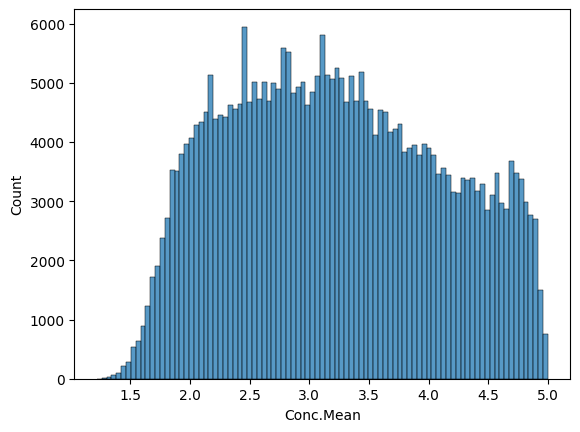

In [4]:
sns.histplot(data=df, x= "Conc.Mean")

In [5]:
df = df.dropna(subset=["Conc.Mean"])

In [6]:
df = df.drop_duplicates(subset=["PRON"])

In [10]:
vectorizer = CountVectorizer(ngram_range=(2,3))

In [11]:
prons = df["PRON"].tolist()

In [12]:
X= vectorizer.fit_transform(prons)

In [15]:
X.toarray().shape

(81444, 2973)

In [33]:
y = np.array(df["Conc.Mean"].tolist())

In [37]:
y= y.reshape(1, y.shape[0])

In [35]:
y

array([2.035, 3.855, 2.56 , ..., 2.005, 2.775, 2.315])

In [26]:
X.toarray().shape

(81444, 2973)

In [38]:
np.corrcoef(y, X)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 81444 and the array at index 1 has size 1

In [29]:
def paerson_np(x, y):
    return np.array([corr_np(x[:, i], y) for i in range(x.shape[1])])

In [ ]:
pearson_np(

In [10]:
vectorizer.get_feature_names_out()


array(['aː aː aː', 'aː aː eː', 'aː aː iː', ..., 'ʒʲ sʲ tʲ', 'ʒʲ vʲ ěː',
       'ʒʲ æː mʲ'], dtype=object)

In [11]:
X.toarray().shape

(81444, 1467)

In [12]:
X[X>0].shape

(1, 2273)

In [ ]:
clustering = AffinityPropagation(random_state=42).fit(X)

In [ ]:
df["Conc_affp_label"]= clustering.predict(X)

In [45]:
kmeans = KMeans(n_clusters =6,  random_state=0, n_init="auto").fit(X)

In [55]:
labels = kmeans.labels_

In [58]:
set(labels)

{0, 1, 2, 3, 4, 5}

In [59]:
df["Conc_kmeans_label"]= labels

In [68]:
df0 = df[df["Conc_kmeans_label"]==0]
df1 = df[df["Conc_kmeans_label"]==1]
df2 = df[df["Conc_kmeans_label"]==2]
df3 = df[df["Conc_kmeans_label"]==3]
df4 = df[df["Conc_kmeans_label"]==4]
df5 = df[df["Conc_kmeans_label"]==5]

In [73]:
df1["Family"].value_counts()

Family
Indo-European              56892
Uralic                      6560
Sino-Tibetan                2961
Austronesian                2626
Koreanic                    2296
Austroasiatic               1428
Tai-Kadai                   1263
Turkic                      1033
Japonic                      792
Kartvelian                   521
Afro-Asiatic                 472
Artificial Language          434
Dravidian                    209
Atlantic-Congo                43
Mongolic-Khitan               40
Athabaskan-Eyak-Tlingit        9
Abkhaz-Adyge                   3
Nakh-Daghestanian              3
Tungusic                       2
Algic                          1
Uto-Aztecan                    1
Name: count, dtype: int64

<Axes: xlabel='Conc.Mean', ylabel='Count'>

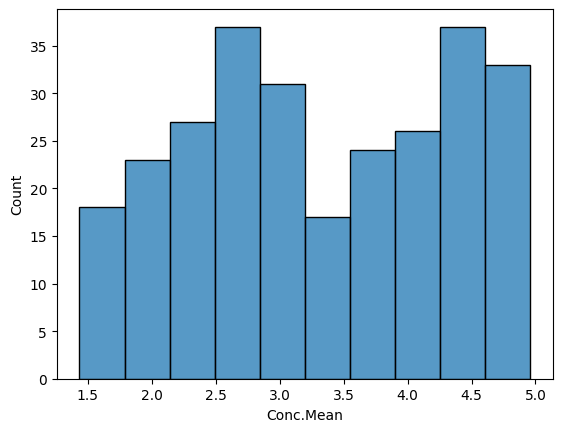

In [69]:
sns.histplot(data=df2, x= "Conc.Mean")

<Axes: xlabel='Conc.Mean', ylabel='Count'>

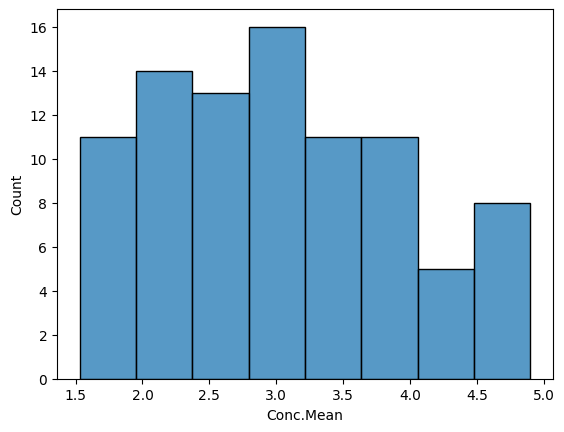

In [70]:
sns.histplot(data=df3, x= "Conc.Mean")

<Axes: xlabel='Conc.Mean', ylabel='Count'>

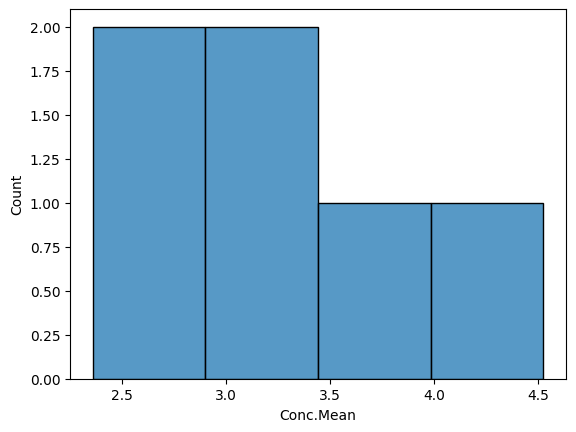

In [63]:
sns.histplot(data=df0, x= "Conc.Mean")

<Axes: xlabel='Conc.Mean', ylabel='Count'>

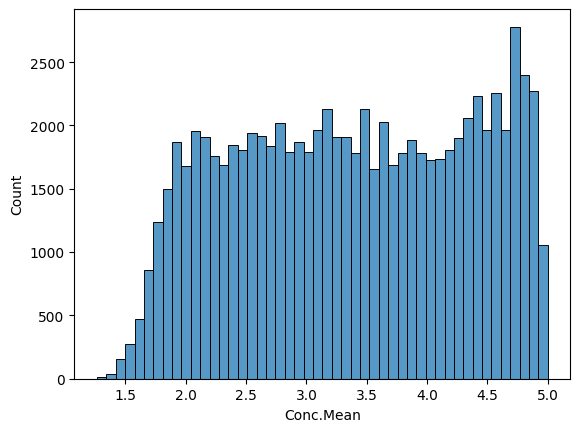

In [67]:
sns.histplot(data=df1, x= "Conc.Mean")

# Get Language Family for the WN PHONEME DATA

In [3]:
df=pd.read_csv("../data/aff+conc/phone_aff_conc_classes.csv")

In [24]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [25]:
df

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae,Conc.CLASS,V.CLASS,A.CLASS,D.CLASS,Conc,V,A,D,Aff,Aff.all
0,a,eng,ə,alpha~settling,2.035,1.230,5.500,2.240,3.670,2.630,6.320,2.480,5.163333,0.490352,Eurasia,0.0,1.0,0.0,2.0,1.0,4.0,2.0,5.0,3.0,-1.0
1,a,hun,ɒː,amplitude~elevator,3.855,0.985,5.950,1.500,3.650,2.250,4.920,2.260,4.840000,0.654389,Eurasia,1.0,1.0,0.0,1.0,2.0,4.0,2.0,3.0,2.0,-1.0
2,a,hun,ɒː,amplitude~legislature,2.730,1.360,3.550,1.570,3.220,2.180,4.480,1.990,3.750000,0.481333,Eurasia,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,1.0,-1.0
3,a,hun,ɒː,amplitude~menopause,3.055,1.405,1.890,1.020,3.550,2.240,4.320,2.810,3.253333,0.486241,Eurasia,1.0,0.0,0.0,1.0,2.0,0.0,2.0,3.0,1.0,-1.0
4,a,hun,ɒː,amplitude~movie,3.755,1.185,7.240,1.510,4.390,2.630,5.680,2.160,5.770000,0.696056,Eurasia,1.0,2.0,1.0,1.0,2.0,6.0,3.0,4.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339687,𐌿𐍂𐍂𐌿𐌽𐍃,got,u r r u n s,dawn~departure,3.765,1.170,5.395,1.750,3.375,2.535,5.035,2.615,4.601667,0.632148,Eurasia,1.0,1.0,0.0,1.0,2.0,4.0,2.0,4.0,2.0,-1.0
339688,𐍃𐌺𐌴𐌹𐌼𐌰,got,s k iː m a,lantern~torch,4.880,0.320,4.935,1.700,4.165,2.195,5.550,2.160,4.883333,0.759296,Eurasia,2.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,2.0,-1.0
339689,𐍅𐌰𐌹𐌽𐌰𐌷𐍃,got,w ɛː n a h s,miserable~unhappy,2.005,1.320,2.220,1.485,5.080,2.720,3.785,2.170,3.695000,0.405778,Eurasia,0.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,-1.0
339690,𐍅𐍉𐌸𐌴𐌹𐍃,got,w oː θ iː s,pleasant~sweet,2.775,1.020,7.505,1.445,3.525,2.720,6.410,1.965,5.813333,0.600463,Eurasia,0.0,2.0,0.0,2.0,1.0,6.0,2.0,5.0,3.0,-1.0


In [6]:
with open("../glottolog-glottolog-2699d10/languages.json") as f:
    languages = json.load(f)

In [12]:
iso2id = {}
for d in languages["resources"]:
    idx = d["id"]
    if len(d["identifiers"])>0:
        identifier = d["identifiers"][0]
        type_identifier = identifier["type"]
        if type_identifier== "iso639-3":
            isocode = identifier["identifier"]
            iso2id[isocode] = idx
    

In [14]:
langs =list(set(df["LANG_PRON"].tolist()))

In [16]:
iso2id_dict = {k:v for k,v in iso2id.items() if k in langs}

In [18]:
len(iso2id_dict), len(langs)

(134, 142)

In [20]:
with open("../data/languages/wn_pron_langs.json", "w") as f:
    json.dump(iso2id_dict, f)

In [21]:
df_langs = pd.read_csv("../data/languages/wn_pron_languages_glotto.csv")

In [29]:
df_langs = df_langs[["Name","Top-level family", "Macroarea", "Latitude", "Longitude", "ISO"]]

In [30]:
df_langs

,Name,Top-level family,Macroarea,Latitude,Longitude,ISO
0,Basque,NaN,Eurasia,43.27870,-1.31622,eus
1,Tonga (Tonga Islands),Austronesian,Papunesia,-21.17000,-175.25000,ton
2,Hawaiian,Austronesian,Papunesia,19.62970,-155.43000,haw
3,Standard Indonesian,Austronesian,Papunesia,-7.33458,109.71600,ind
4,Tagalog,Austronesian,Papunesia,14.06000,121.74700,tgl
...,...,...,...,...,...,...
129,Finnish,Uralic,Eurasia,64.76280,25.55770,fin
130,Karelian,Uralic,Eurasia,65.16910,30.86550,krl
131,North Saami,Uralic,Eurasia,68.72500,22.11130,sme
132,Classical Nahuatl,Uto-Aztecan,North America,19.72000,-96.97000,nci


In [31]:
df

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae,Conc.CLASS,V.CLASS,A.CLASS,D.CLASS,Conc,V,A,D,Aff,Aff.all
0,a,eng,ə,alpha~settling,2.035,1.230,5.500,2.240,3.670,2.630,6.320,2.480,5.163333,0.490352,Eurasia,0.0,1.0,0.0,2.0,1.0,4.0,2.0,5.0,3.0,-1.0
1,a,hun,ɒː,amplitude~elevator,3.855,0.985,5.950,1.500,3.650,2.250,4.920,2.260,4.840000,0.654389,Eurasia,1.0,1.0,0.0,1.0,2.0,4.0,2.0,3.0,2.0,-1.0
2,a,hun,ɒː,amplitude~legislature,2.730,1.360,3.550,1.570,3.220,2.180,4.480,1.990,3.750000,0.481333,Eurasia,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,1.0,-1.0
3,a,hun,ɒː,amplitude~menopause,3.055,1.405,1.890,1.020,3.550,2.240,4.320,2.810,3.253333,0.486241,Eurasia,1.0,0.0,0.0,1.0,2.0,0.0,2.0,3.0,1.0,-1.0
4,a,hun,ɒː,amplitude~movie,3.755,1.185,7.240,1.510,4.390,2.630,5.680,2.160,5.770000,0.696056,Eurasia,1.0,2.0,1.0,1.0,2.0,6.0,3.0,4.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339687,𐌿𐍂𐍂𐌿𐌽𐍃,got,u r r u n s,dawn~departure,3.765,1.170,5.395,1.750,3.375,2.535,5.035,2.615,4.601667,0.632148,Eurasia,1.0,1.0,0.0,1.0,2.0,4.0,2.0,4.0,2.0,-1.0
339688,𐍃𐌺𐌴𐌹𐌼𐌰,got,s k iː m a,lantern~torch,4.880,0.320,4.935,1.700,4.165,2.195,5.550,2.160,4.883333,0.759296,Eurasia,2.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,2.0,-1.0
339689,𐍅𐌰𐌹𐌽𐌰𐌷𐍃,got,w ɛː n a h s,miserable~unhappy,2.005,1.320,2.220,1.485,5.080,2.720,3.785,2.170,3.695000,0.405778,Eurasia,0.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,-1.0
339690,𐍅𐍉𐌸𐌴𐌹𐍃,got,w oː θ iː s,pleasant~sweet,2.775,1.020,7.505,1.445,3.525,2.720,6.410,1.965,5.813333,0.600463,Eurasia,0.0,2.0,0.0,2.0,1.0,6.0,2.0,5.0,3.0,-1.0


In [32]:
df_merge = pd.merge(df, df_langs, how="left",  left_on="LANG_PRON", right_on="ISO")

In [35]:
df_merge.rename(columns={"Top-level family":"Family"}, inplace=True)

In [37]:
df_merge.to_csv("../data/aff+conc/wn_pron_all.csv", index=False)